In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
# Read in csv file

csv = "Combined_Weather_Data-Copy1.csv"

data = pd.read_csv(csv)

In [3]:
# Create dataframe of raw precipitation data

raw_prec_df = pd.DataFrame(data)

raw_prec_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DSND,DSNW,EMSD,EMSN,EMXP,PRCP,SNOW
0,US1NCCC0010,"POINT HARBOR 0.2 WSW, NC US",36.078571,-75.797325,2.1,2021-02,NaN,NaN,NaN,NaN,1.84,9.37,NaN
1,US1NCBT0037,"MERRY HILL 3.2 N, NC US",36.058530,-76.765730,10.7,2021-02,NaN,NaN,NaN,NaN,1.00,7.34,NaN
2,US1NCCC0014,"COROLLA 5.8 SSE, NC US",36.299000,-75.803000,2.7,2021-02,NaN,NaN,NaN,NaN,1.19,9.06,NaN
3,USC00317319,"ROANOKE RAPIDS, NC US",36.478930,-77.671410,64.0,2021-02,NaN,NaN,NaN,NaN,1.40,8.21,NaN
4,US1NCCC0015,"GRANDY 0.6 E, NC US",36.242784,-75.867977,0.6,2021-02,NaN,NaN,NaN,NaN,1.40,8.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,US1NCRN0001,"ASHEBORO 2.2 SSE, NC US",35.689200,-79.801000,255.1,2009-02,NaN,NaN,NaN,NaN,0.48,1.48,NaN
4283,US1NCRW0004,"ENOCHVILLE 3.8 W, NC US",35.524935,-80.733197,217.9,2009-02,NaN,NaN,NaN,NaN,0.51,1.44,NaN
4284,US1NCJH0003,"SMITHFIELD 2.8 SE, NC US",35.476217,-78.312172,39.9,2009-02,NaN,NaN,NaN,NaN,0.78,1.38,NaN
4285,US1NCRW0002,"CHINA GROVE 4.4 W, NC US",35.563451,-80.658223,263.3,2009-02,NaN,NaN,NaN,NaN,0.35,1.51,NaN


In [4]:
# Group data by yeaR

print(raw_prec_df["DATE"].unique())

prec_groupby_year = raw_prec_df.groupby("DATE")

['2021-02' '2019-02' '2017-02' '2015-02' '2013-02' '2011-02' '2009-02']


In [5]:
# Use sum method to calculate total measured precipitation by year

total_annual_prec = prec_groupby_year["PRCP"].sum()

total_annual_prec

DATE
2009-02     725.23
2011-02    1018.11
2013-02    2233.09
2015-02    2031.15
2017-02     755.43
2019-02    3596.71
2021-02    4904.66
Name: PRCP, dtype: float64

In [6]:
# Reset index

total_annual_prec = total_annual_prec.reset_index()

In [11]:
# Convert total annual measured precipitation to dataframe

total_annual_prec_df = pd.DataFrame(total_annual_prec)

total_annual_prec_df

,DATE,PRCP
0,2009-02,725.23
1,2011-02,1018.11
2,2013-02,2233.09
3,2015-02,2031.15
4,2017-02,755.43
5,2019-02,3596.71
6,2021-02,4904.66


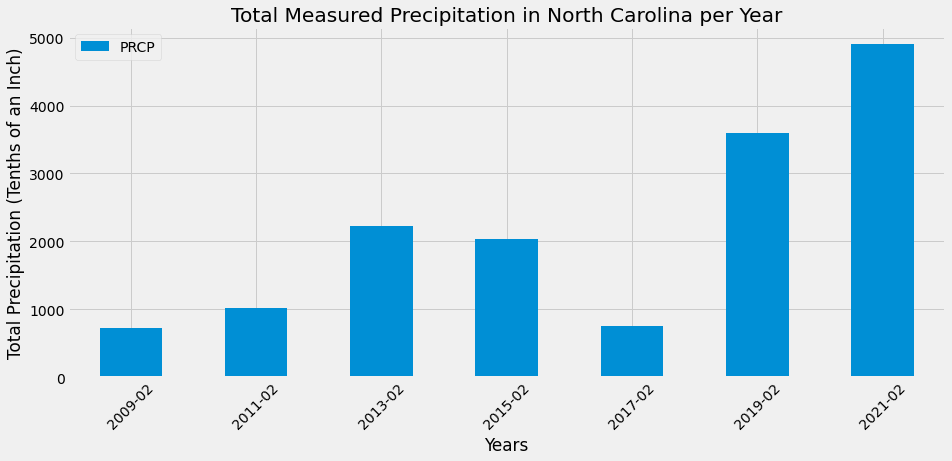

In [12]:
# Plot bar graph

bar_prec = total_annual_prec_df.plot(kind="bar", figsize = (14,6))

plt.title("Total Measured Precipitation in North Carolina per Year")

bar_prec.set_xticklabels(total_annual_prec_df["DATE"], rotation = 45)

plt.ylabel("Total Precipitation (Tenths of an Inch)")

plt.xlabel("Years")

plt.style.use("ggplot")

In [13]:
# matplotlib available styles

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [10]:
# Plot scatter plot

